In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
data.shape

(1338, 7)

In [28]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Visualize data

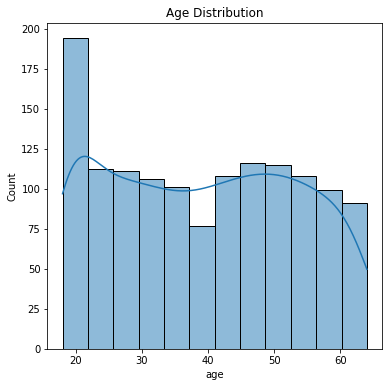

In [31]:
plt.figure(figsize=(6,6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

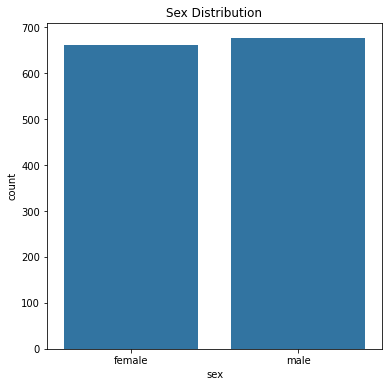

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

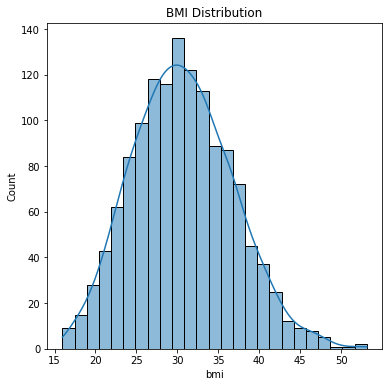

In [33]:
plt.figure(figsize=(6,6))
sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

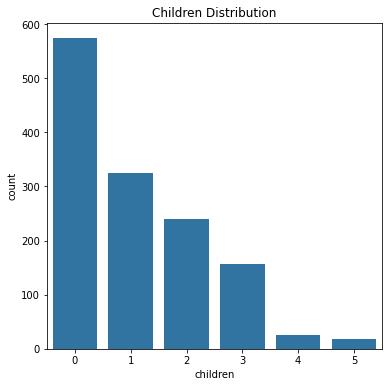

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children Distribution')
plt.show()

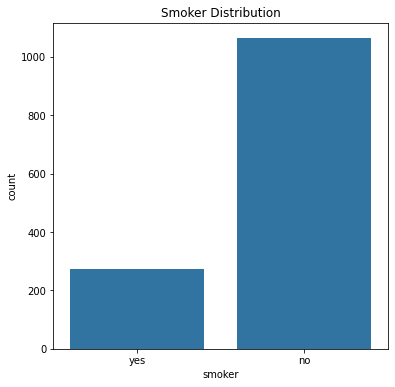

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('Smoker Distribution')
plt.show()

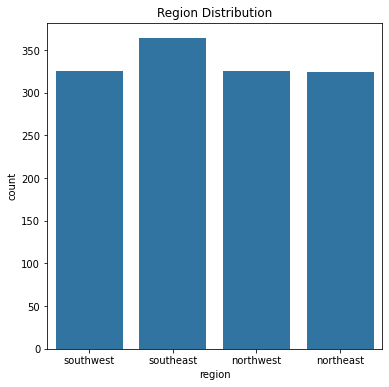

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('Region Distribution')
plt.show()

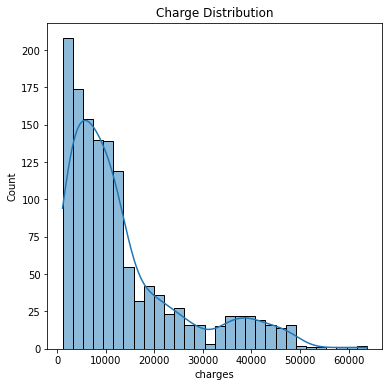

In [37]:
plt.figure(figsize=(6,6))
sns.histplot(data['charges'], kde=True)
plt.title('Charge Distribution')
plt.show()

Data pre-processing

In [38]:
print(data['sex'].unique())
print(data['smoker'].unique())
print(data['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [39]:
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':0,'no':1})
data['region']=data['region'].map({'southwest':0,'southeast':1, 'northwest':2,'northeast':3})

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Split features and target

In [41]:
X = data.drop(columns='charges', axis=1)
Y = data['charges']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Train the model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
lr = LinearRegression()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()

In [45]:
lr.fit(X_train, Y_train)
gbr.fit(X_train, Y_train)
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [46]:
Y_pred_lr = lr.predict(X_test)
Y_pred_gbr = gbr.predict(X_test)
Y_pred_rfr = rfr.predict(X_test)

In [50]:
def evaluate_model(Y_test, Y_pred, model_name):
    mae = metrics.mean_absolute_error(Y_test, Y_pred)
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)
    print(f'{model_name} - MAE: {mae}, MSE: {mse}, R2: {r2}')

evaluate_model(Y_test, Y_pred_lr, 'Linear Regression')
evaluate_model(Y_test, Y_pred_gbr, 'Gradient Boosting Regressor')
evaluate_model(Y_test, Y_pred_rfr, 'Random Forest Regressor')

Linear Regression - MAE: 3930.3332739011403, MSE: 31845929.13415944, R2: 0.7998747145449959
Gradient Boosting Regressor - MAE: 2437.4250491395856, MSE: 16203207.566149391, R2: 0.8981762621589179
Random Forest Regressor - MAE: 2645.335071287872, MSE: 19796865.07103203, R2: 0.8755931014992803


Performance of Gradient Boosting Regressor is better compared to others

In [51]:
input_data = {'age': [23], 'sex': [1], 'bmi': [28.4], 'children': [2], 'smoker': [1], 'region': [2]}

input_df = pd.DataFrame(input_data)

prediction = gbr.predict(input_df)

print('Predicted medical insurance cost is $', prediction[0])

Predicted medical insurance cost is $ 6410.983189829227
